In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings("ignore")

In [ ]:
p=pd.read_csv("Bengaluru_House_Data.csv")
p.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
p.duplicated().any()

True

In [ ]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
p.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
p[p['balcony']==0].count()

,0
area_type,1029
availability,1029
location,1029
size,1029
society,402
total_sqft,1029
bath,1029
balcony,1029
price,1029


In [ ]:
p.describe(include="all")

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


In [ ]:
from sklearn.impute import SimpleImputer
s=SimpleImputer(strategy="mean")
p[["bath"]]=s.fit_transform(p[["bath"]])

In [ ]:
v=SimpleImputer(strategy="most_frequent")
p[["society","size","location"]]=v.fit_transform(p[["society","size","location"]])

In [ ]:
p["size"]=p['size'].str.replace("BHK","").astype(str)
p["size"]=p['size'].str.replace("Bedroom","").astype(str)

In [ ]:
p.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
society,0
total_sqft,0
bath,0
balcony,609
price,0


In [ ]:
p.drop_duplicates().any()

,0
area_type,True
availability,True
location,True
size,True
society,True
total_sqft,True
bath,True
balcony,True
price,True


In [ ]:
p.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
m=p[["area_type",'total_sqft','bath', 'balcony','price',"size"]]
p[["area_type",'total_sqft','bath', 'balcony','price',"size"]]=m

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
l=LabelEncoder()
for i in m:
    p[i]=l.fit_transform(p[i])

In [ ]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   area_type     13320 non-null  int64 
 1   availability  13320 non-null  object
 2   location      13320 non-null  object
 3   size          13320 non-null  int64 
 4   society       13320 non-null  object
 5   total_sqft    13320 non-null  int64 
 6   bath          13320 non-null  int64 
 7   balcony       13320 non-null  int64 
 8   price         13320 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 936.7+ KB


In [ ]:
p.describe(include="all")

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320.000000,13320,13320,13320.000000,13320,13320.000000,13320.000000,13320.000000,13320.000000
unique,NaN,81,1305,NaN,2688,NaN,NaN,NaN,NaN
top,NaN,Ready To Move,Whitefield,NaN,GrrvaGr,NaN,NaN,NaN,NaN
freq,NaN,10581,541,NaN,5582,NaN,NaN,NaN,NaN
mean,2.290315,NaN,NaN,10.920871,NaN,762.983258,2.108709,1.694820,1138.128453
std,1.143846,NaN,NaN,2.992402,NaN,630.502696,1.683550,0.944453,517.686451
min,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,2.000000,NaN,NaN,10.000000,NaN,239.000000,1.000000,1.000000,740.000000
50%,3.000000,NaN,NaN,12.000000,NaN,554.000000,1.000000,2.000000,1244.000000
75%,3.000000,NaN,NaN,12.000000,NaN,1208.000000,3.000000,2.000000,1599.000000


In [ ]:
p.drop(['availability', 'location','society'],axis=1,inplace=True)

In [ ]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   area_type   13320 non-null  int64
 1   size        13320 non-null  int64
 2   total_sqft  13320 non-null  int64
 3   bath        13320 non-null  int64
 4   balcony     13320 non-null  int64
 5   price       13320 non-null  int64
dtypes: int64(6)
memory usage: 624.5 KB


In [ ]:
p.columns

Index(['area_type', 'size', 'total_sqft', 'bath', 'balcony', 'price'], dtype='object')

In [ ]:
x=p.drop(['price'],axis=1)
y=p['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
before=pd.DataFrame(X_train,columns=['area_type', 'size', 'total_sqft', 'bath', 'balcony'])
before

,area_type,size,total_sqft,bath,balcony
2870,3,10,200,1,2
6114,3,10,30,1,1
5733,3,10,150,1,2
9378,3,10,215,1,3
9301,3,10,132,1,1
...,...,...,...,...,...
11964,2,15,239,4,1
5191,3,12,642,3,2
5390,3,10,74,1,1
860,2,16,239,4,2


# SCALE

In [ ]:
from sklearn.preprocessing import QuantileTransformer

In [ ]:
s=QuantileTransformer()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [ ]:
after=pd.DataFrame(X_train,columns=['area_type', 'size', 'total_sqft', 'bath', 'balcony'])
after

,area_type,size,total_sqft,bath,balcony
0,1.000000,0.257758,0.182683,0.315816,0.634635
1,1.000000,0.257758,0.022896,0.315816,0.258759
2,1.000000,0.257758,0.129711,0.315816,0.634635
3,1.000000,0.257758,0.197698,0.315816,0.889389
4,1.000000,0.257758,0.118118,0.315816,0.258759
...,...,...,...,...,...
8919,0.266767,0.950951,0.248749,0.874875,0.258759
8920,1.000000,0.647648,0.551260,0.703203,0.634635
8921,1.000000,0.257758,0.062062,0.315816,0.258759
8922,0.266767,0.973473,0.248749,0.874875,0.634635


# Scale Test

## Before

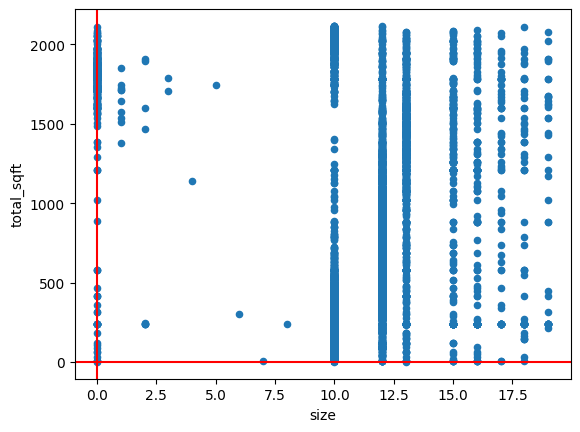

In [ ]:
before.plot.scatter(x="size",y="total_sqft")
plt.axhline(0,alpha=1,c="red")
plt.axvline(0,c="red",alpha=1)

## After

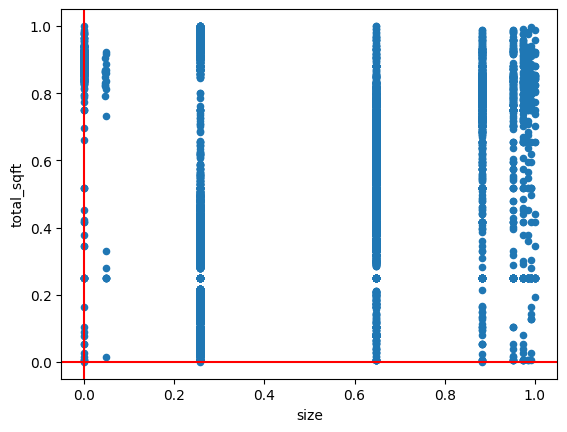

In [ ]:
after.plot.scatter(x="size",y="total_sqft")
plt.axhline(0,alpha=1,c="red")
plt.axvline(0,c="red",alpha=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import*
from sklearn.metrics import*
from xgboost import XGBRegressor

In [ ]:
ln=LinearRegression()
ln.fit(X_train,y_train)
pn=ln.predict(X_test)
svr=SVR()
svr.fit(X_train,y_train)
pvr=svr.predict(X_test)
rfr= RandomForestRegressor()
rfr.fit(X_train,y_train)
prfr=rfr.predict(X_test)
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
pgbr=gbr.predict(X_test)
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
pxgb=xgb.predict(X_test)

In [ ]:
new=pd.DataFrame({"models":["LN","SVR","RFReg","GBR","XGBR"],"R2_Score":[r2_score(y_test,pn),
                                r2_score(y_test,pvr),
                                r2_score(y_test,prfr),
                                r2_score(y_test,pgbr),
                                r2_score(y_test,pxgb)]})
new

,models,R2_Score
0,LN,0.494353
1,SVR,0.430304
2,RFReg,0.679524
3,GBR,0.682172
4,XGBR,0.689239


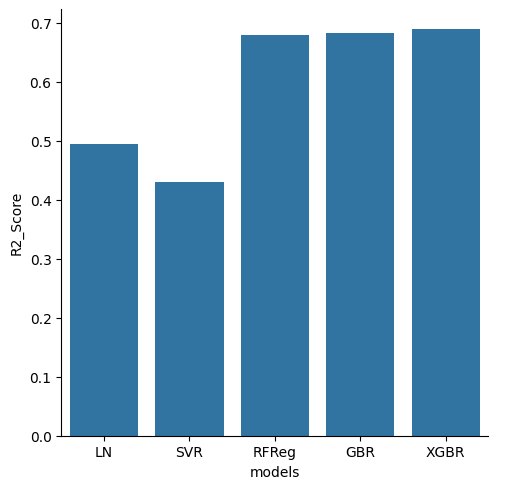

In [ ]:
sns.catplot(data=new,x="models",y="R2_Score",kind="bar")

# Winner XGBRegressor

# Save  MODEL

In [ ]:
x=p.drop("price",axis=1)
y=p['price']
x=s.fit_transform(x)
xfg=XGBRegressor()
xfg.fit(x,y)
import joblib
joblib.dump(xfg,"Bengaluru_House_Data")
model=joblib.load("Bengaluru_House_Data")

In [ ]:
model.predict(s.transform([[3,18,1345,15,3]]))

array([1722.584], dtype=float32)

In [ ]:
p.columns

Index(['area_type', 'size', 'total_sqft', 'bath', 'balcony', 'price'], dtype='object')

In [ ]:
p['area_type'].unique()

array([3, 2, 0, 1])

In [ ]:
p['size'].unique().max()

19

In [ ]:
p['total_sqft'].unique().max()

2116

In [ ]:
p['bath'].unique().max()

19

In [ ]:
p['balcony'].unique()

array([1, 3, 4, 2, 0])

# GUI